In [116]:
import numpy as np
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import matplotlib.image as mpimg
import skimage
from skimage import filters
import math
from scipy.ndimage.filters import convolve
from PIL import Image,ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

/tmp/ipykernel_2717/688088273.py:15: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [117]:
DATA_DIR = "dataset/SCOCOFing/Real/"
list_dirs = list(glob.glob(DATA_DIR+"*.BMP"))
num_images = len(list_dirs)

/tmp/ipykernel_2717/2424481308.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image1 = imageio.imread(display_list[0])
/tmp/ipykernel_2717/2424481308.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image2 = imageio.imread(display_list[1])
/tmp/ipykernel_2717/2424481308.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image3 = imageio.imread(display_list[2])


(103, 96, 4) (103, 96, 4) (103, 96, 4)


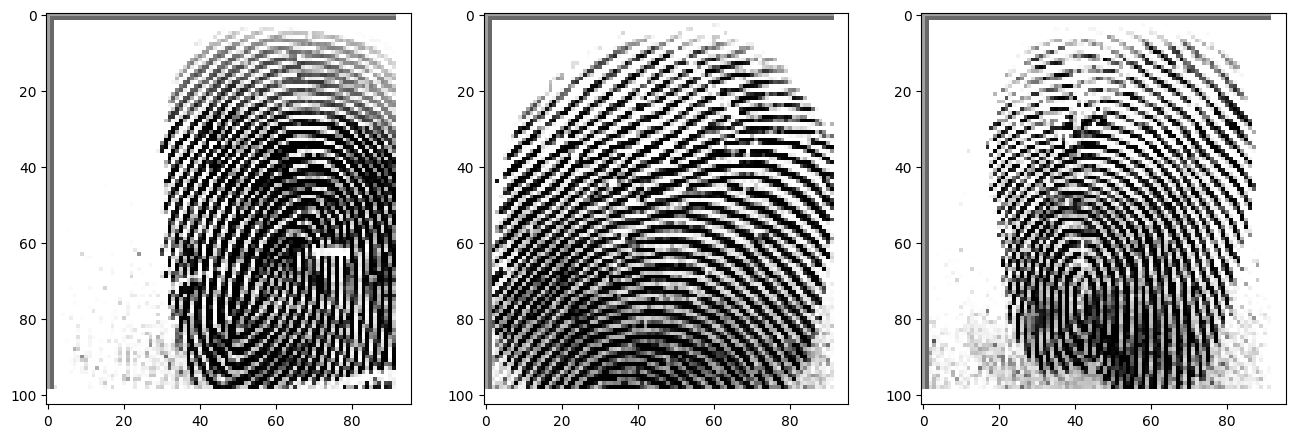

In [118]:
random.seed(36)

r = random.randint(0,num_images)
display_list = list_dirs[r:r+3]

image1 = imageio.imread(display_list[0])
image2 = imageio.imread(display_list[1])
image3 = imageio.imread(display_list[2])

print(image1.shape, image2.shape, image3.shape)

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

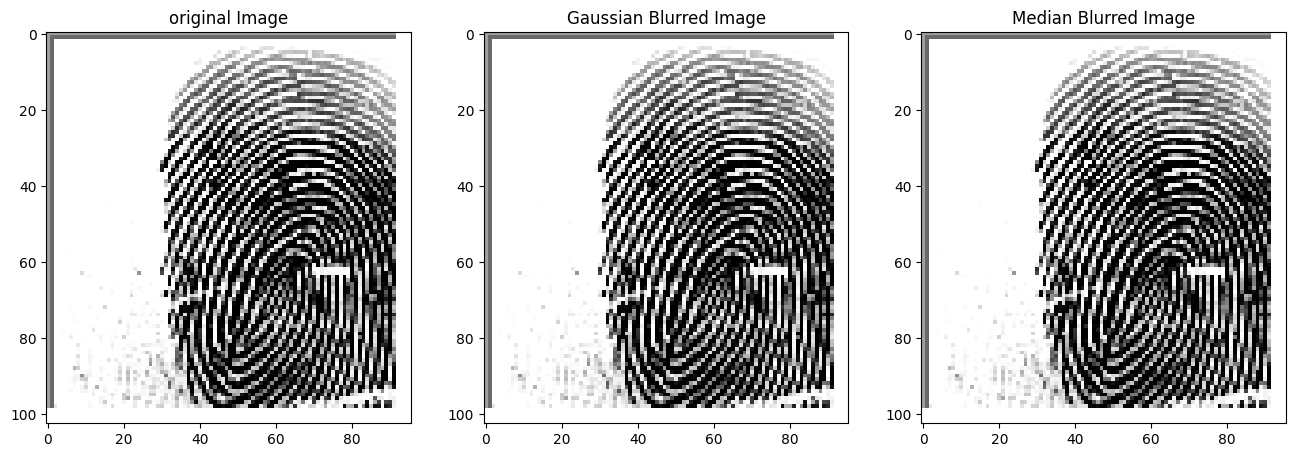

In [119]:
gauss_blur = cv2.GaussianBlur(image1,(1,1),0)
median_blur = cv2.medianBlur(image1,1)

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].set_title("original Image");
axes[0].imshow(image1);
axes[1].set_title("Gaussian Blurred Image");
axes[1].imshow(gauss_blur);
axes[2].set_title("Median Blurred Image");
axes[2].imshow(median_blur);

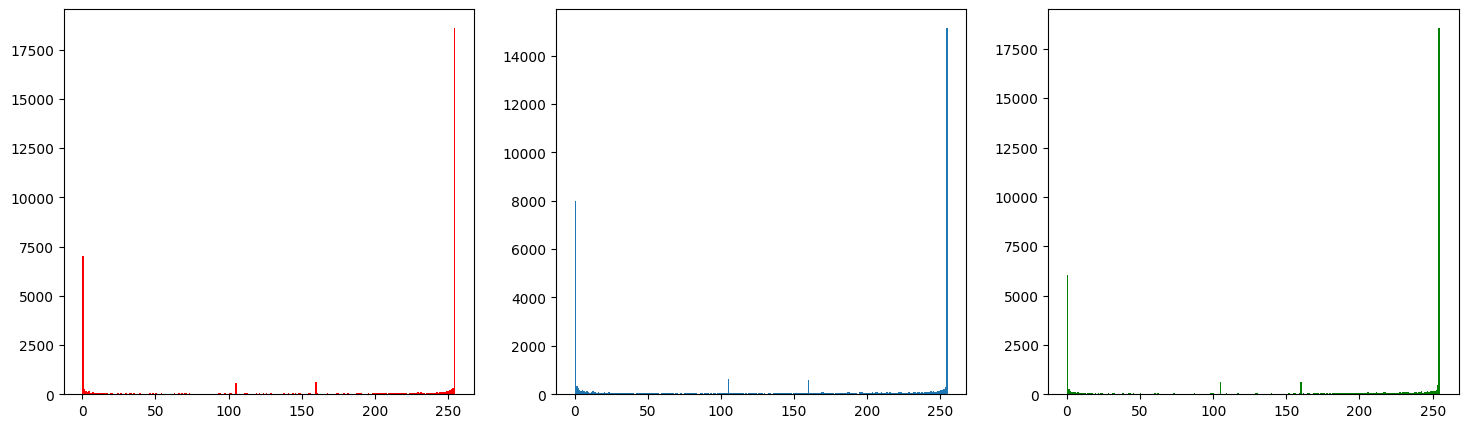

In [120]:
fig, axes = plt.subplots(1,3,figsize = (18,5))
axes[0].hist(image1.ravel(), bins=256, color ="r");
axes[1].hist(image2.ravel(), bins=256);
axes[2].hist(image3.ravel(), bins=256, color ="g");

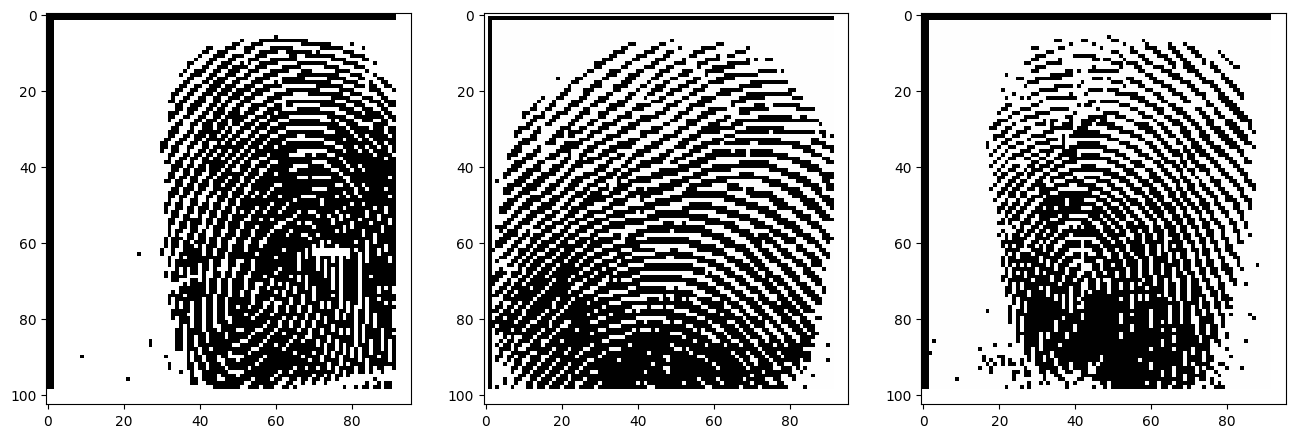

In [121]:
# mean thresholding - gives bad results
THRESHOLD1 = image1.mean()
THRESHOLD2 = image2.mean()
THRESHOLD3 = image3.mean()

image1 = np.array(image1 > THRESHOLD1).astype(int) * 255
image2 = np.array(image2 > THRESHOLD2).astype(int) * 254
image3 = np.array(image3 > THRESHOLD3).astype(int) * 254

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

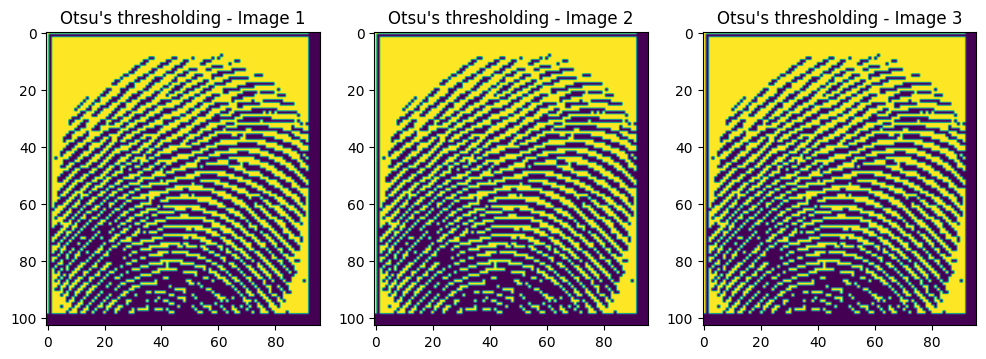

In [122]:
# Adaptive thresholding from OpenCV library - better than Mean Thresholding
img1 = cv2.imread(display_list[0],0)
img2 = cv2.imread(display_list[1],0)
img3 = cv2.imread(display_list[2],0)

# Otsu's thresholding
ret1,th1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Otsu's thresholding - Image 1");
axes[0].imshow(th2);
axes[1].set_title("Otsu's thresholding - Image 2");
axes[1].imshow(th2);
axes[2].set_title("Otsu's thresholding - Image 3");
axes[2].imshow(th2);

In [123]:
# convert to grayscale
img_name = display_list[0]
gray_img_array = np.array(Image.open(img_name).convert('P'))

In [124]:
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

In [125]:
# implementing:
gray_img = Image.fromarray(gray_img_array)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

convolved_img3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3 =  convolve(gray_img,horizontal_prewitt_filter )

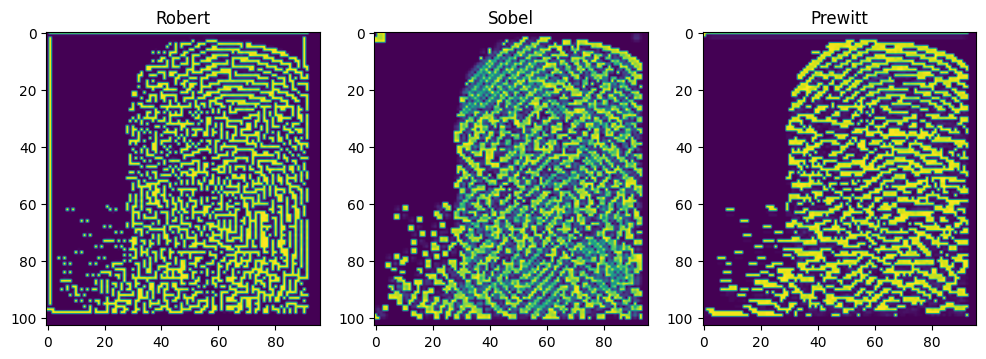

In [126]:
fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Robert");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel");
axes[1].imshow(convolved_img2);
axes[2].set_title("Prewitt");
axes[2].imshow(convolved_img3);

/tmp/ipykernel_2717/2613638648.py:5: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = hessian_matrix(gray, sigma=sigma, order='rc')


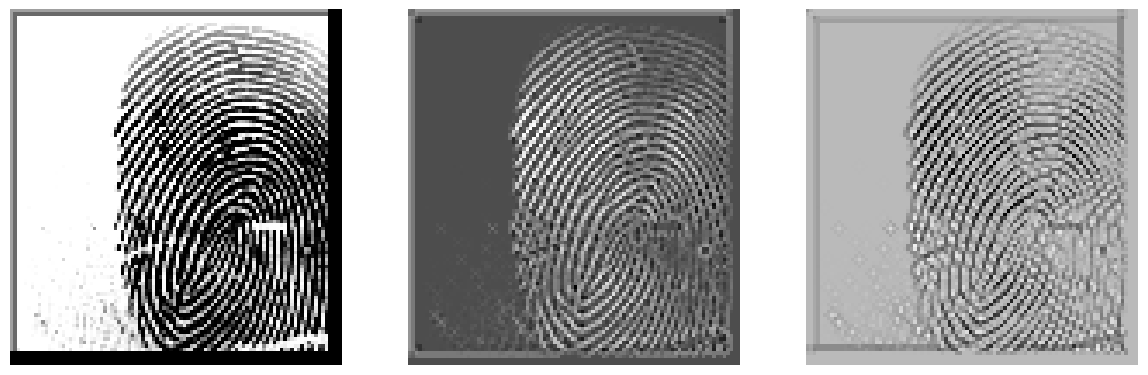

In [127]:
# Ridge detection 
src_path = img_name

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread(src_path, 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{src_path}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)

In [128]:
# Termination, Bifurcation -> Minutiae Detection
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    
    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))         
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [129]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
        return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)


def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)
    
    WindowSize = 2          
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1 
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    return(FeaturesTerm, FeaturesBif)

def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    # Bifurcations (Red)
    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    # Terminations (Blue)
    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));
        
    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

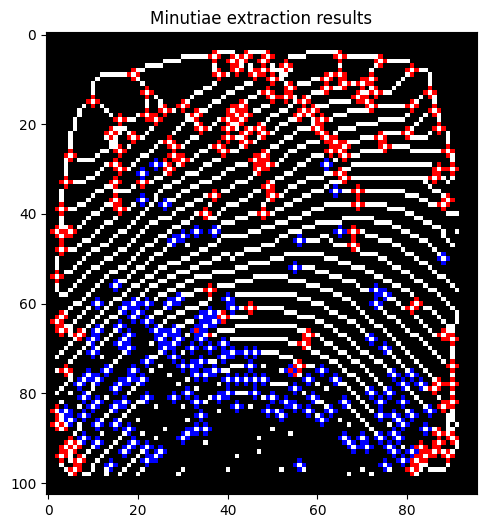

In [130]:
img_name = display_list[1]
img = cv2.imread(img_name,0);
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)

In [131]:
termination_coordinates = []
for feature in FeaturesTerm:
    termination_coordinates.append((feature.locX, feature.locY))

print(termination_coordinates)

[(29, 24), (29, 62), (31, 21), (35, 64), (37, 21), (38, 26), (44, 33), (44, 37), (44, 65), (45, 30), (46, 28), (46, 56), (50, 88), (52, 55), (56, 15), (57, 73), (58, 75), (59, 29), (59, 40), (60, 11), (60, 19), (60, 22), (60, 27), (60, 73), (61, 17), (61, 41), (62, 20), (62, 36), (63, 34), (64, 22), (64, 37), (65, 16), (65, 35), (66, 11), (66, 24), (66, 28), (66, 33), (67, 18), (68, 26), (68, 10), (68, 28), (68, 34), (68, 72), (69, 16), (69, 39), (70, 18), (70, 26), (70, 32), (70, 36), (70, 75), (71, 10), (71, 41), (71, 44), (71, 46), (72, 28), (72, 39), (73, 22), (73, 34), (74, 30), (74, 32), (74, 45), (75, 13), (75, 19), (75, 37), (75, 54), (75, 61), (76, 9), (76, 33), (76, 35), (76, 77), (76, 81), (77, 11), (77, 18), (77, 21), (77, 40), (77, 42), (77, 44), (77, 46), (77, 48), (77, 58), (77, 64), (78, 7), (78, 16), (78, 79), (78, 83), (79, 55), (80, 31), (80, 40), (80, 46), (80, 72), (80, 76), (81, 8), (81, 22), (81, 28), (81, 38), (81, 50), (81, 59), (82, 74), (82, 10), (82, 17), (8

In [132]:
bifurcation_coordinates = []
for feature in FeaturesBif:
    bifurcation_coordinates.append((feature.locX, feature.locY))

print(bifurcation_coordinates)

[(5, 37), (5, 44), (6, 48), (5, 65), (6, 41), (6, 74), (7, 53), (8, 81), (8, 42), (9, 47), (10, 65), (9, 19), (9, 38), (13, 50), (10, 62), (10, 72), (11, 70), (13, 22), (12, 54), (12, 62), (13, 85), (13, 73), (14, 53), (14, 69), (15, 10), (15, 57), (16, 72), (16, 30), (16, 43), (16, 81), (17, 86), (18, 24), (18, 40), (17, 59), (18, 33), (18, 44), (18, 56), (19, 16), (19, 61), (21, 34), (21, 40), (22, 48), (23, 62), (21, 87), (22, 14), (22, 44), (22, 80), (23, 19), (24, 27), (24, 39), (24, 74), (24, 44), (25, 66), (26, 89), (27, 5), (28, 16), (26, 63), (28, 27), (28, 47), (27, 66), (30, 90), (30, 87), (32, 66), (33, 4), (32, 86), (33, 15), (33, 21), (35, 49), (35, 69), (38, 15), (36, 37), (38, 88), (39, 3), (38, 69), (40, 35), (40, 48), (44, 2), (44, 5), (44, 68), (47, 68), (48, 3), (54, 2), (57, 36), (60, 82), (61, 45), (64, 2), (63, 39), (66, 34), (67, 7), (68, 58), (67, 88), (68, 90), (74, 90), (75, 4), (74, 56), (78, 90), (79, 86), (83, 88), (82, 90), (84, 2), (87, 2), (87, 4), (89,

In [133]:
# st.line block 
import numpy as np
import math

def divide_image_into_blocks(image, num_rows, num_cols):

    rows, cols = image.shape[:2]
    row_step = math.ceil(rows / num_rows)
    col_step = math.ceil(cols / num_cols)
    blocks = []

    for r in range(num_rows):
        for c in range(num_cols):
            start_row = r * row_step
            end_row = min((r + 1) * row_step, rows)
            start_col = c * col_step
            end_col = min((c + 1) * col_step, cols)
            blocks.append(((start_row, end_row), (start_col, end_col)))

    return blocks

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def calculate_angle(point1, point2):
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]
    return math.degrees(math.atan2(dy, dx))

def compute_straight_lines(reference_block, adjacent_blocks):
    lines = []

    for point_ref in reference_block:
        for block in adjacent_blocks:
            for point_adj in block:
                distance = euclidean_distance(point_ref, point_adj)
                angle = calculate_angle(point_ref, point_adj)
                lines.append((distance, angle))

    return lines

def compute_straight_lines(termination_points, bifurcation_points):
    lines = []
    for term_point in termination_points:
        for bif_point in bifurcation_points:
            # Compute the length and angle between each termination and bifurcation point
            length = ((bif_point[0] - term_point[0]) ** 2 + (bif_point[1] - term_point[1]) ** 2) ** 0.5
            angle = math.atan2(bif_point[1] - term_point[1], bif_point[0] - term_point[0]) * 180 / math.pi
            lines.append((length, angle))
    return lines

lines = compute_straight_lines(termination_coordinates, bifurcation_coordinates)
#print(lines)

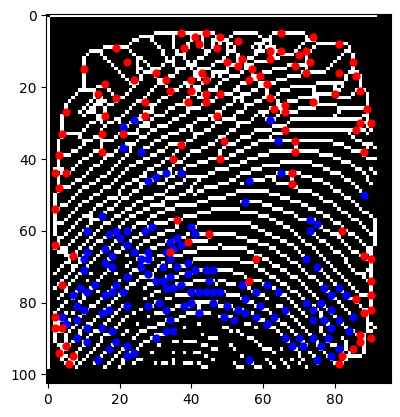

In [134]:
def display_points_on_image(skel_img, termination_points, bifurcation_points):
    skel_img_uint8 = np.uint8(skel_img)
    plt.imshow(skel_img_uint8, cmap='gray')

    for term_point in termination_points:
        plt.plot(term_point[1], term_point[0], 'bo', markersize=5)

    for bif_point in bifurcation_points:
        plt.plot(bif_point[1], bif_point[0], 'ro', markersize=5)

    plt.show()

img_name = display_list[1]  
img = cv2.imread(img_name, 0)  
THRESHOLD1 = 128  
img_binary = np.array(img > THRESHOLD1).astype(int)  
skel = skimage.morphology.skeletonize(img_binary)  
skel_uint8 = np.uint8(skel) * 255  
display_points_on_image(skel_uint8, termination_coordinates, bifurcation_coordinates)

In [135]:
def calculate_straight_lines(termination_points, bifurcation_points):
    straight_lines = []
    for term_point in termination_points:
        for bif_point in bifurcation_points:
            # Calculate length and angle
            length = math.sqrt((bif_point[0] - term_point[0]) ** 2 + (bif_point[1] - term_point[1]) ** 2)
            angle = math.atan2(bif_point[1] - term_point[1], bif_point[0] - term_point[0]) * 180 / math.pi
            straight_lines.append((length, angle))
    return straight_lines

straight_lines = calculate_straight_lines(termination_coordinates, bifurcation_coordinates)

#print(straight_lines)


In [136]:
# obscuring the straight lines
def obscure_straight_lines(lines):
    obscured_lines = []

    for length, angle in lines:
        length = max(length, 0)
        angle = max(angle, 0)

        length_binary = format(int(length), 'b')
        angle_binary = format(int(angle), 'b')

        max_length = max(len(length_binary), len(angle_binary))
        length_binary = length_binary.zfill(max_length)
        angle_binary = angle_binary.zfill(max_length)

        length_xor_angle = ''.join(str(int(bit1) ^ int(bit2)) for bit1, bit2 in zip(length_binary, angle_binary))

        obscured_lines.append((length_xor_angle, angle_binary))

    return obscured_lines

obscured_lines = obscure_straight_lines(lines)
#print(obscured_lines)


In [137]:
# Bio crypto key generation

AES_SBOX = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
)

def generate_bio_crypto_key(obscured_lines):
    concatenated_binary = ''.join(line[0] for line in obscured_lines)

    sbox_output = ''.join([format(AES_SBOX[int(concatenated_binary[i:i+8], 2)], '08b') for i in range(0, len(concatenated_binary), 8)])

    # Ensure key size is 1024 bits
    while len(sbox_output) < 1024:
        A1 = np.random.permutation(1024) + 1 
        A2 = np.random.permutation(1024) + 1  
        for i in range(len(sbox_output), 1024):
            j = i + 1
            k = (A2[A1[i % 1024] - 1] - 1) % len(sbox_output)
            sbox_output += sbox_output[k]

    # Trim to 1024 bits if longer
    sbox_output = sbox_output[:1024]

    return sbox_output

bio_crypto_key = generate_bio_crypto_key(obscured_lines)
print("Bio-crypto key:", bio_crypto_key)

Bio-crypto key: 011001001101110001001001011110011100110001000111110000011010010100000001101110011011111110100111100010101101101011011001100110111111110010101001010110000101010001101010100011110101110010101010010110110100110000011111111101010000111101101001011110001101000000010100110111000001000100100011000011011010011100100001111010111100101110001001101011010100001010110000100001110011100010100011100101000001000010101110101101000000110111010010001001001110111011010101110100101000111001000011101010000001100111110001110110101011010001011110110111101001011101110101110001010101110011100101111110010111111101110011110100101101010010100101110110111000111001110001010101000101010011011111000010110111000011011010000011011010011101111101101111111010100010100001001000011011000111011011000011000110010101111001100011111010001111010010000111101000010010101111110000000100101011010011010100011000001101011010111100010101100000001011011111100010110101101000100001000110010001010100010000000010110101010101

In [138]:
def generate_codeword(F_max):
    generator_poly = [1, 0, 1, 0, 0]  # G(x) = x^3 + 1
    irreducible_poly = [1, 1, 0, 1]    # m(x) = x^4 + x^3 + 1

    codeword_poly = []

    degree = len(generator_poly) - 1

    max_message_bits = 2 ** (degree + len(F_max[0]))

    for element in F_max:
        message_bits = [abs(value) for value in element] 

        message_poly = np.zeros(degree + len(message_bits) - 1)
        message_poly[0] = message_bits[0]
        message_poly[-1] = message_bits[0]

        shifted_message_poly = np.roll(message_poly, degree)

        _, remainder = np.polydiv(shifted_message_poly, generator_poly)

        binary_remainder = [bin(int(coef))[2:] for coef in remainder]  # Remove '0b' prefix
        codeword_poly.extend(binary_remainder)

    return codeword_poly

F_max = lines 
codeword = generate_codeword(F_max)
#print("Codeword polynomial (binary):", codeword)
#concatenated_codeword = ''.join(codeword)
#print("Codeword Concatenated binary:", concatenated_codeword)  